En esta notebook se habla de

* datos obtenidos para 72 Universidades
* Usar el proceso fuzzy para calcular un fuzzy poset
* Obtener algunos cortes-$\alpha$ 
* Se calculan los posets $m^2$ y $m^3$. Son posets fuzzy, por lo que hay que elegir una forma de hacerlos crisp. Para ello primero usé mayor que los demás, sin ser iguales.
* Se estudian los valores de membresía para extensiones lineales para distintos posets obtenidos: $m^2$, $m^3$ y varios $\alpha$-cut.

En esta notebook se habla de

* Nuevos diagramas para 20 y 30 universidades
* Resultados de la renovada comparativa entre $m^2$ y $m^3$. El fuzzy por estos, no es compatible con las extensiones lineales usando $m^2$ y $m^3$ crisp.
* Comparativa poset $1/n$ contra puntuaciones reales.

In [1]:
using CSV
using DataFrames
using Posets
using Plots
import Statistics: mean, median
using LaTeXStrings
using DelimitedFiles

In [2]:
list_dataframes = [DataFrame(CSV.File("data/"*f)) for f in readdir("data")]

14-element Array{DataFrame,1}:
 100×2 DataFrame
│ Row │ Univ                                    │ Points  │
│     │ String                                  │ Float64 │
├─────┼─────────────────────────────────────────┼─────────┤
│ 1   │ HarvardUniversity                       │ 100.0   │
│ 2   │ StanfordUniversity                      │ 83.5    │
│ 3   │ CaliforniaInstituteofTechnology         │ 76.3    │
│ 4   │ UniversityofCalifornia,Berkeley         │ 74.0    │
│ 5   │ UniversityofCambridge                   │ 73.4    │
│ 6   │ MassachusettsInstituteofTechnology(MIT) │ 70.6    │
│ 7   │ PrincetonUniversity                     │ 62.5    │
│ 8   │ YaleUniversity                          │ 61.1    │
│ 9   │ UniversityofOxford                      │ 59.5    │
│ 10  │ ColumbiaUniversity                      │ 59.1    │
⋮
│ 90  │ UniversityofIowa                        │ 27.0    │
│ 91  │ UniversityofGoettingen                  │ 26.9    │
│ 92  │ UniversityofMelbourne                   │ 

In [37]:
nombresbuenos = intersect([l.Univ for l in list_dataframes]...);
nombresbuenos = nombresbuenos[1:30];

In [38]:
data_filtrada = [xxx[([x ∈ nombresbuenos for x in xxx.Univ]),:] for xxx in list_dataframes]

14-element Array{DataFrame,1}:
 30×2 DataFrame
│ Row │ Univ                                    │ Points  │
│     │ String                                  │ Float64 │
├─────┼─────────────────────────────────────────┼─────────┤
│ 1   │ HarvardUniversity                       │ 100.0   │
│ 2   │ StanfordUniversity                      │ 83.5    │
│ 3   │ CaliforniaInstituteofTechnology         │ 76.3    │
│ 4   │ UniversityofCalifornia,Berkeley         │ 74.0    │
│ 5   │ UniversityofCambridge                   │ 73.4    │
│ 6   │ MassachusettsInstituteofTechnology(MIT) │ 70.6    │
│ 7   │ PrincetonUniversity                     │ 62.5    │
│ 8   │ YaleUniversity                          │ 61.1    │
│ 9   │ UniversityofOxford                      │ 59.5    │
│ 10  │ ColumbiaUniversity                      │ 59.1    │
⋮
│ 20  │ UniversityCollegeLondon                 │ 48.9    │
│ 21  │ UniversityofMichigan-AnnArbor           │ 48.8    │
│ 22  │ WashingtonUniversityinSt.Louis          │ 4

Ignoren la 1er columna _row_

In [9]:
show(sort(data_filtrada[14], [:Points], rev = true), allrows = true)

72×2 DataFrame
│ Row │ Univ                                                  │ Points  │
│     │ String                                                │ Float64 │
├─────┼───────────────────────────────────────────────────────┼─────────┤
│ 1   │ HarvardUniversity                                     │ 100.0   │
│ 2   │ StanfordUniversity                                    │ 74.7    │
│ 3   │ UniversityofCalifornia,Berkeley                       │ 70.1    │
│ 4   │ UniversityofCambridge                                 │ 69.6    │
│ 5   │ MassachusettsInstituteofTechnology(MIT)               │ 69.2    │
│ 6   │ PrincetonUniversity                                   │ 62.0    │
│ 7   │ UniversityofOxford                                    │ 58.9    │
│ 8   │ CaliforniaInstituteofTechnology                       │ 57.8    │
│ 9   │ ColumbiaUniversity                                    │ 56.7    │
│ 10  │ UniversityofChicago                                   │ 54.2    │
│ 11  │ YaleUniversity 

In [47]:
show(sort(data_filtrada[2], by = first), allrows=true) 

30×2 DataFrame
│ Row │ Univ                                              │ Points  │
│     │ String                                            │ Float64 │
├─────┼───────────────────────────────────────────────────┼─────────┤
│ 1   │ CornellUniversity                                 │ 55.5    │
│ 2   │ ColumbiaUniversity                                │ 61.2    │
│ 3   │ CaliforniaInstituteofTechnology                   │ 69.0    │
│ 4   │ HarvardUniversity                                 │ 100.0   │
│ 5   │ KyotoUniversity                                   │ 48.3    │
│ 6   │ MassachusettsInstituteofTechnology(MIT)           │ 72.4    │
│ 7   │ NorthwesternUniversity                            │ 39.5    │
│ 8   │ PrincetonUniversity                               │ 63.6    │
│ 9   │ RockefellerUniversity                             │ 40.2    │
│ 10  │ SwissFederalInstituteofTechnologyZurich           │ 43.2    │
│ 11  │ StanfordUniversity                                │ 77.2    │
│ 12 

In [11]:
show(sort(data_filtrada[2], by = first), allrows=true) 

72×2 DataFrame
│ Row │ Univ                                                  │ Points  │
│     │ String                                                │ Float64 │
├─────┼───────────────────────────────────────────────────────┼─────────┤
│ 1   │ BostonUniversity                                      │ 26.3    │
│ 2   │ BrownUniversity                                       │ 26.8    │
│ 3   │ CarnegieMellonUniversity                              │ 30.3    │
│ 4   │ CornellUniversity                                     │ 55.5    │
│ 5   │ ColumbiaUniversity                                    │ 61.2    │
│ 6   │ CaliforniaInstituteofTechnology                       │ 69.0    │
│ 7   │ DukeUniversity                                        │ 38.9    │
│ 8   │ HarvardUniversity                                     │ 100.0   │
│ 9   │ King'sCollegeLondon                                   │ 28.0    │
│ 10  │ KarolinskaInstitute                                   │ 33.0    │
│ 11  │ KyotoUniversity

In [20]:
show(sort(data_filtrada[2], by = first), allrows=true) 

20×2 DataFrame
│ Row │ Univ                                              │ Points  │
│     │ String                                            │ Float64 │
├─────┼───────────────────────────────────────────────────┼─────────┤
│ 1   │ CornellUniversity                                 │ 55.5    │
│ 2   │ ColumbiaUniversity                                │ 61.2    │
│ 3   │ CaliforniaInstituteofTechnology                   │ 69.0    │
│ 4   │ MassachusettsInstituteofTechnology(MIT)           │ 72.4    │
│ 5   │ PrincetonUniversity                               │ 63.6    │
│ 6   │ StanfordUniversity                                │ 77.2    │
│ 7   │ TheImperialCollegeofScience,TechnologyandMedicine │ 46.4    │
│ 8   │ TheUniversityofTokyo                              │ 51.9    │
│ 9   │ UniversityCollegeLondon                           │ 44.3    │
│ 10  │ UniversityofWashington                            │ 49.1    │
│ 11  │ UniversityofMichigan-AnnArbor                     │ 49.3    │
│ 12 

In [49]:
sort(data_filtrada[1], by = first)

,Univ,Points
,String,Float64
1,BostonUniversity,25.9
2,BrownUniversity,33.9
3,CarnegieMellonUniversity,31.2
4,CornellUniversity,56.9
5,ColumbiaUniversity,59.1
6,CaliforniaInstituteofTechnology,76.3
7,DukeUniversity,40.4
8,HarvardUniversity,100.0
9,King'sCollegeLondon,29.2


## captura de datos

In [39]:
puntuaciones = hcat([(sort(d, by = first).Points) for d in data_filtrada]...)/100;

In [40]:
poset_mn = puntuaciones |> fuzzy;

In [41]:
poset_m3 = puntuaciones |> m3;

In [42]:
poset_m2 = puntuaciones |> m2;

In [43]:
writedlm("figs/poset0p1_univ_30.dat", αcut_poset(poset_mn, 0.1))
#;./script.wl figs/poset0p1_univ.dat

In [44]:
;./script.wl figs/poset0p1_univ_30.dat

figs/poset0p1_univ_30.png


La grafica de abajo no me gusta porque muestra que el fuzzy y los cortes $\alpha$ eliminan mucha informacion.

![ejemplo](figs/poset0p1_univ_30.png)

In [45]:
writedlm("figs/poset0p95_univ_30.dat", αcut_poset(poset_mn, .95))

In [46]:
;./script.wl figs/poset0p95_univ_30.dat

figs/poset0p95_univ_30.png


![ejemplo](figs/poset0p95_univ_30.png)

$$
\mathrm{SH}(\tilde x, \tilde y) =
\left\{\begin{array}{ll}
\frac{\sum_{i} \min \left\{p_{i}(x), p_{i}(y)\right\}}{\sum_{i} p_{i}(x)} & \text { if } \sum_{i} p_{i}(x) \neq 0 \\
1 & \text { otherwise }
\end{array}\right.
$$

In [21]:
writedlm("figs/poset0p55_univ_20.dat", αcut_poset(poset_mn, .5))

In [23]:
;./script.wl figs/poset0p55_univ_20.dat

figs/poset0p55_univ_20.png


![ejemplo](figs/poset0p55_univ_20.png)

#### cosas viejas

In [ ]:
writedlm("/home/david/poset0p1_univ.dat", αcut_poset(poset_mn, .1))

In [ ]:
writedlm("/home/david/poset0p5_univ.dat", αcut_poset(poset_mn, .5))

In [ ]:
writedlm("/home/david/poset0p7_univ.dat", αcut_poset(poset_mn, .7))

In [ ]:
writedlm("/home/david/poset0p95_univ.dat", αcut_poset(poset_mn, .95))

In [ ]:
writedlm("/home/david/poset0p97_univ.dat", αcut_poset(poset_mn, .97))

## Puntuaciones $1/n$

In [24]:
ranks_univs = [sortperm(puntuaciones[:,x], rev = true) for x in 1:14]

14-element Array{Array{Int64,1},1}:
 [6, 3, 19, 18, 4, 5, 20, 17, 2, 16, 1, 15, 14, 13, 12, 8, 11, 7, 10, 9]
 [6, 19, 18, 4, 3, 5, 17, 2, 16, 20, 1, 15, 8, 14, 13, 12, 11, 10, 7, 9]
 [19, 6, 18, 4, 3, 2, 5, 17, 16, 20, 1, 15, 14, 13, 12, 11, 8, 10, 7, 9]
 [19, 6, 18, 4, 3, 2, 5, 17, 16, 20, 1, 15, 14, 13, 12, 11, 8, 10, 7, 9]
 [6, 19, 18, 4, 3, 2, 5, 17, 16, 20, 1, 15, 14, 13, 12, 11, 8, 10, 7, 9]
 [6, 19, 18, 4, 3, 2, 5, 17, 16, 20, 1, 15, 14, 13, 12, 11, 8, 10, 9, 7]
 [6, 19, 18, 4, 3, 2, 5, 17, 16, 20, 1, 15, 14, 13, 12, 11, 8, 10, 9, 7]
 [19, 6, 4, 18, 3, 5, 2, 17, 16, 20, 1, 15, 14, 13, 12, 11, 8, 10, 9, 7]
 [6, 4, 19, 18, 3, 5, 2, 17, 16, 20, 15, 1, 14, 13, 12, 11, 10, 8, 9, 7]
 [6, 4, 19, 18, 3, 5, 2, 17, 16, 20, 15, 1, 14, 13, 12, 11, 8, 10, 9, 7]
 [6, 19, 4, 18, 3, 5, 2, 17, 16, 20, 15, 1, 14, 13, 12, 11, 8, 10, 9, 7]
 [6, 4, 19, 18, 5, 3, 2, 16, 17, 20, 15, 1, 14, 13, 12, 11, 10, 8, 7, 9]
 [6, 4, 19, 18, 5, 3, 2, 17, 16, 20, 15, 1, 14, 13, 12, 10, 11, 8, 9, 7]
 [6, 19, 18, 4,

In [25]:
puntuaciones_preposet = mn(ranks_univs)

20×14 Array{Float64,2}:
 0.0909091  0.0909091  0.0909091  …  0.0833333  0.0833333  0.0833333
 0.111111   0.125      0.166667      0.142857   0.142857   0.125
 0.5        0.2        0.2           0.166667   0.166667   0.142857
 0.2        0.25       0.25          0.5        0.5        0.25
 0.166667   0.166667   0.142857      0.2        0.2        0.2
 1.0        1.0        0.5        …  1.0        1.0        1.0
 0.0555556  0.0526316  0.0526316     0.0526316  0.05       0.0526316
 0.0625     0.0769231  0.0588235     0.0555556  0.0555556  0.0588235
 0.05       0.05       0.05          0.05       0.0526316  0.05
 0.0526316  0.0555556  0.0555556     0.0588235  0.0625     0.0555556
 0.0588235  0.0588235  0.0625     …  0.0625     0.0588235  0.0625
 0.0666667  0.0625     0.0666667     0.0666667  0.0666667  0.0666667
 0.0714286  0.0666667  0.0714286     0.0714286  0.0714286  0.0714286
 0.0769231  0.0714286  0.0769231     0.0769231  0.0769231  0.0769231
 0.0833333  0.0833333  0.0833333     0.0

In [26]:
poset_mn_old = puntuaciones_preposet |> fuzzy

20×20 Array{Float64,2}:
 1.0       0.598206  0.412364  0.265835  …  0.300557  0.160079   0.850585
 1.0       1.0       0.689333  0.444387     0.50243   0.267598   0.977998
 1.0       1.0       1.0       0.57968      0.667638  0.36646    1.0
 1.0       1.0       0.8992    1.0          0.844898  0.515217   1.0
 1.0       0.941973  0.736     0.501289     0.566764  0.301863   1.0
 1.0       1.0       1.0       1.0       …  1.0       0.804348   1.0
 0.587763  0.351603  0.242372  0.156248     0.176656  0.0940885  0.499942
 0.680779  0.407246  0.280729  0.180975     0.204613  0.108978   0.57906
 0.58538   0.350178  0.241389  0.155615     0.17594   0.0937071  0.497916
 0.642346  0.384256  0.26488   0.170758     0.193061  0.102826   0.54637
 0.703976  0.421123  0.290294  0.187142  …  0.211585  0.112692   0.598791
 0.757099  0.452901  0.3122    0.201264     0.227551  0.121196   0.643977
 0.810935  0.485106  0.3344    0.215575     0.243732  0.129814   0.689769
 0.873016  0.522244  0.36      0.232

In [27]:
writedlm("figs/poset0p95_univ_o_20.dat", αcut_poset(poset_mn_old, .95))

In [28]:
;./script.wl figs/poset0p95_univ_o_20.dat

figs/poset0p95_univ_o_20.png


![ejemplo](figs/poset0p95_univ_o_20.png)

In [64]:
writedlm("figs/poset0p95_univ_o_20.dat", αcut_poset(poset_mn_old, .55))

In [65]:
;./script.wl figs/poset0p55_univx_o.dat

figs/poset0p55_univx_o.png


![ejemplo](figs/poset0p55_univx_o.png)

# Poset $m^2$ y $m^3$

In [16]:
puntuaciones |> size

(72, 14)

In [30]:
poset_m3 = puntuaciones |> m3;

In [31]:
poset_m3 |> pareja_matrizadyacencia;

In [32]:
poset_m2 = puntuaciones |> m2;

In [34]:
poset_m2 |> pareja_matrizadyacencia;

In [35]:
writedlm("figs/posetm3_univ_20.dat", poset_m3 |> pareja_matrizadyacencia)

In [36]:
;./script.wl figs/posetm3_univ_20.dat

figs/posetm3_univ_20.png


![ejemplo](figs/posetm3_univ_20.png)

In [38]:
writedlm("figs/posetm2_univ.dat", poset_m2 |> pareja_matrizadyacencia)

In [39]:
;./script.wl figs/posetm2_univ.dat

figs/posetm2_univ.png


![ejemplo](figs/posetm2_univ.png)

In [ ]:
writedlm("/home/david/poset0p97_univ_.dat", αcut_poset(poset_m3 |> fuzzy, .97))

In [ ]:
writedlm("/home/david/poset0p85_univ_.dat", αcut_poset(poset_m3 |> fuzzy, .85))

In [ ]:
writedlm("/home/david/poset0p70_univ_.dat", αcut_poset(poset_m3 |> fuzzy, .70))

## Entropía

La entropia $R(A)$ se define a continuacion.
$$
R_{1}(A)=\frac{\sum\!\operatorname{Count}\left(A \cap A^{c}\right)}{\sum\!\operatorname{Count}\left(A \cup A^{c}\right)}
$$
Notar que no es una definicion _probabilistica_. Esta entropia cuantifica que tan borroso es el poset.

El valor maximo de la entropia para un poset borroso de $n$ nodos es
$$
R_{\max} = 
\frac{n(n-1)}{n^2 + n} = \frac{n-1}{n+1}.
$$

In [10]:
poset_m3 = puntuaciones |> m3;

In [11]:
poset_m2 = puntuaciones |> m2;

In [46]:
listaentropia = [fentropia( puntuaciones[:,1:i] |> m3 |> fuzzy ) for i in 2:14]

13-element Array{Float64,1}:
 0.1425911660704125
 0.1422885965720925
 0.141422394683047
 0.1408842081754943
 0.14058122035951728
 0.14010802346760884
 0.13989671192143882
 0.13968058896646982
 0.13938977988180284
 0.13913604269857993
 0.13873087683864505
 0.1384836429907421
 0.1381628650017251

In [47]:
listaentropia_m2 = [fentropia( puntuaciones[:,1:i] |> m2 |> fuzzy ) for i in 2:14]

13-element Array{Float64,1}:
 0.1427818003210507
 0.14207434992100476
 0.14126081837001955
 0.14096970370721934
 0.1409557973854166
 0.14051835967755144
 0.14041035607054358
 0.14026219545074162
 0.1400836835242995
 0.13985485131368378
 0.13935981080354826
 0.13908506125811562
 0.13854093228615208

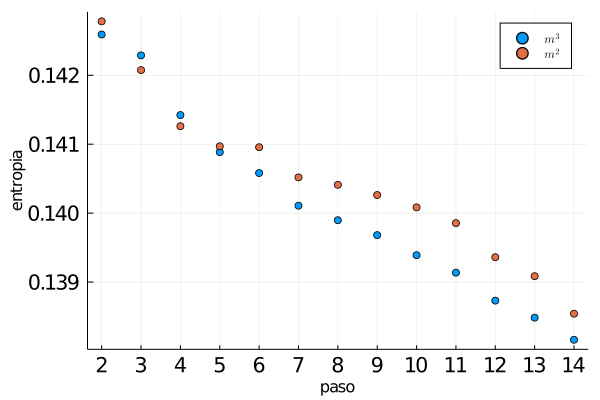

In [52]:
scatter([listaentropia listaentropia_m2],labels = [L"m^3" L"m^2"], xlabel = "paso", ylabel = "entropia", xtickfontsize=14,ytickfontsize=14, xtick = (1:13, 2:14))

# Permutaciones

Las permutaciones sugeridas por el Dr. Pineda.

In [54]:
puntuacionpermutada = permpuntuaciones(puntuaciones, 6);

permpuntuaciones realiza 6 permutaciones de las puntuaciones por columnas. Las permutaciones son transposiciones adyacentes.

In [55]:
listaentropia_b = [fentropia( puntuacionpermutada[:,1:i] |> m3 |> fuzzy ) for i in 2:14]

13-element Array{Float64,1}:
 0.1426103131279451
 0.145628154317814
 0.1469163123025016
 0.14657308756227666
 0.14654287622024872
 0.14687883132601703
 0.14629750348793633
 0.1464343407977806
 0.14829109029486925
 0.1479293797119629
 0.14761651423199543
 0.14945768219055472
 0.1488182201607198

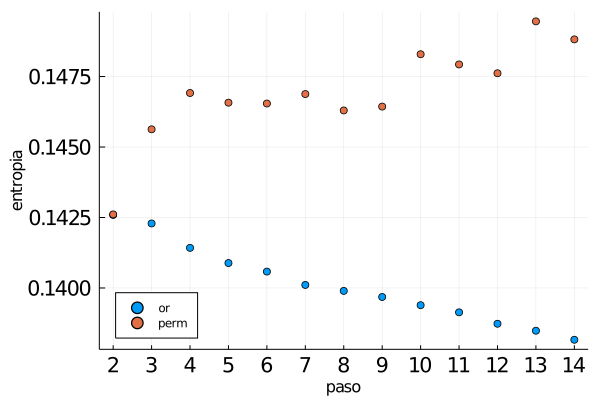

In [56]:
scatter([ listaentropia listaentropia_b], labels = ["or" "perm"], xlabel = "paso", ylabel = "entropia", xtickfontsize=14,ytickfontsize=14, xtick = (1:13, 2:14), legend=:bottomleft)

# Distribución $\Lambda(\tilde P)$

En esta parte, considero los valores de pertenencia para distintas extensiones lineales aleatorias.

**Adendum**: el resultado de esta sección, con respecto a los posets $m^2$ y $m^3$, es como sigue.
Considérense las extensiones lineales calculadas del poset obtenido ---por $m^i$.
Estas extensiones lineales reciben un valor de membresía igual a $0$ para el poset borroso, usando
la lista de puntuaciones con $m^2$.

El proceso fue el siguiente:
1. encontrar un poset crisp
2. calcular extensiones lineales aleatorias de éste, $L_2$ y $L_3$ para los posets $m^2$ y $m^3$, respectivamente.
3. usar $L$ para los posets $m^2$ y $m^3$.

In [18]:
posetsaleatorios_m2 = [caminatale(poset_m2 |> pareja_matrizadyacencia,10^2) for _ in 1:72^2]

5184-element Array{Array{Int64,1},1}:
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  38, 2, 27, 18, 12, 9, 37, 23, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  38, 2, 27, 18, 12, 9, 37, 23, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  38, 2, 27, 18, 12, 9, 37, 23, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  38, 2, 27, 18, 12, 9, 37, 23, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  38, 2, 27, 18, 12, 9, 37, 23, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  38, 2, 27, 18, 12, 9, 37, 23, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  38, 2, 27, 18, 12, 9, 37, 23, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  38, 2, 27, 18, 12, 9, 37, 23, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  38, 2, 27, 18, 12, 9, 37, 23, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  38, 2, 27, 18, 12, 9, 37, 23, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  38, 2, 27, 18, 12, 9, 37, 23, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  38, 2, 27, 18, 12, 9, 37, 23, 1, 13]
 [8, 26, 69, 6

In [13]:
posetsaleatorios_m3 = [caminatale(poset_m3 |> pareja_matrizadyacencia,10^2) for _ in 1:72^2]

5184-element Array{Array{Int64,1},1}:
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  19, 38, 27, 2, 18, 23, 12, 37, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  19, 38, 27, 2, 18, 23, 12, 37, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  19, 38, 27, 2, 18, 23, 12, 37, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  19, 38, 27, 2, 18, 23, 12, 37, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  19, 38, 27, 2, 18, 23, 12, 37, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  19, 38, 27, 2, 18, 23, 12, 37, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  19, 38, 27, 2, 18, 23, 12, 37, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  19, 38, 27, 2, 18, 23, 12, 37, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  19, 38, 27, 2, 18, 23, 12, 37, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  19, 38, 27, 2, 18, 23, 12, 37, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  19, 38, 27, 2, 18, 23, 12, 37, 1, 13]
 [8, 26, 69, 68, 15, 22, 6, 67, 5, 72  …  19, 38, 27, 2, 18, 23, 12, 37, 1, 13]
 [

Primero vemos como el poset $m^2$ no es compatible con el $m^3$.

In [23]:
poset_m2 |> pareja_matrizadyacencia

72×72 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  1  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  1  0  0  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  0  0  1  0  1  1  1  1  1     1  1  1  1  0  0  0  0  0  1  1  0
 1  1  1  1  0  0  1  0  1  1  1  1  1     1  1  1  1  1  1  0  0  0  1  1  1
 1  1  1  1  1  0  1  0  1  1  1  1  1  …  1  1  1  1  1  1  1  0  0  1  1  1
 1  1  1  0  0  0  0  0  1  1  0  1  1     0  0  0  0  0  0  0  0  0  1  0  0
 1  1  1  1  1  1  1  0  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  0  0  0  0  0  0  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  0  0  0  0  1  0  0  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  0  0  1  0  1  1  0  1  1  …  0  0  0  0  0  0  0  0  0  1  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0    

In [19]:
countmap([membresia(x, poset_m2|> fuzzy) for x in unique!(posetsaleatorios_m2)])

Dict{Int64,Int64} with 1 entry:
  0 => 36

In [20]:
countmap([membresia(x, poset_m3|> fuzzy) for x in unique!(posetsaleatorios_m2)])

Dict{Real,Int64} with 3 entries:
  0.00113701 => 33
  0          => 2
  0.00120192 => 1

... y viceversa.

In [16]:
countmap([membresia(x, poset_m2|> fuzzy) for x in unique!(posetsaleatorios_m3)])

Dict{Int64,Int64} with 1 entry:
  0 => 38

In [17]:
countmap([membresia(x, poset_m3|> fuzzy) for x in unique!(posetsaleatorios_m3)])

Dict{Float64,Int64} with 2 entries:
  0.00113701 => 35
  0.00120773 => 3

Ahora vamos a comparar la compatibilidad entre distintos $\alpha$ cuts

In [96]:
posetsaleatorios_alpha0p5 = [caminatale(αcut_poset(poset_mn, .5),10^2) for _ in 1:72^2]

5184-element Array{Array{Int64,1},1}:
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 4, 9, 12, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 3, 13, 2, 1]
 [

In [103]:
posetsaleatorios_alpha0p5

1088-element Array{Array{Int64,1},1}:
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 4, 9, 12, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 3, 13, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [

Por lo tanto, los $\alpha$-cut no son compatibles con $m^2$ y $m^3$.

In [97]:
countmap([membresia(x, poset_m2|> fuzzy) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Int64,Int64} with 1 entry:
  0 => 1088

In [98]:
countmap([membresia(x, poset_m3|> fuzzy) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Int64,Int64} with 1 entry:
  0 => 1088

Vemos que los $\alpha$-cuts no son compatibles con $\alpha'<\alpha$.

In [105]:
countmap([membresia(x, αcut_poset(poset_mn, .7)) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Int64,Int64} with 1 entry:
  0 => 1088

In [104]:
countmap([membresia(x, αcut_poset(poset_mn, .6)) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Int64,Int64} with 1 entry:
  0 => 1088

In [99]:
countmap([membresia(x, αcut_poset(poset_mn, .5)) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 1088

In [100]:
countmap([membresia(x, αcut_poset(poset_mn, .4)) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 1088

In [101]:
countmap([membresia(x, αcut_poset(poset_mn, .3)) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 1088

In [102]:
countmap([membresia(x, αcut_poset(poset_mn, .1)) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 1088

Ahora vamos a comparar la compatibilidad entre distintos $\alpha$ cuts

In [96]:
posetsaleatorios_alpha0p5 = [caminatale(αcut_poset(poset_mn, .5),10^2) for _ in 1:72^2]

5184-element Array{Array{Int64,1},1}:
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 4, 9, 12, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 3, 13, 2, 1]
 [

In [106]:
posetsaleatorios_alpha0p67 = [caminatale(αcut_poset(poset_mn, .67),10^2) for _ in 1:72^2]|>unique!;

In [121]:
posetsaleatorios_alpha0p78 = [caminatale(αcut_poset(poset_mn, .78),10^2) for _ in 1:72^2]|>unique!;

In [103]:
posetsaleatorios_alpha0p5

1088-element Array{Array{Int64,1},1}:
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 4, 9, 12, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 3, 13, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [

Por lo tanto, los $\alpha$-cut no son compatibles con $m^2$ y $m^3$.

In [97]:
countmap([membresia(x, poset_m2|> fuzzy) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Int64,Int64} with 1 entry:
  0 => 1088

In [98]:
countmap([membresia(x, poset_m3|> fuzzy) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Int64,Int64} with 1 entry:
  0 => 1088

Vemos que los $\alpha$-cuts no son ---necesariamente--- compatibles con $\alpha'<\alpha$.

In [114]:
countmap([membresia(x, αcut_poset(poset_mn, .8)) for x in unique!(posetsaleatorios_alpha0p67)])

Dict{Int64,Int64} with 1 entry:
  0 => 1318

In [115]:
countmap([membresia(x, αcut_poset(poset_mn, .7)) for x in unique!(posetsaleatorios_alpha0p67)])

Dict{Int64,Int64} with 1 entry:
  0 => 1318

In [116]:
countmap([membresia(x, αcut_poset(poset_mn, .6)) for x in unique!(posetsaleatorios_alpha0p67)])

Dict{Int64,Int64} with 1 entry:
  0 => 1318

In [117]:
countmap([membresia(x, αcut_poset(poset_mn, .5)) for x in unique!(posetsaleatorios_alpha0p67)])

Dict{Int64,Int64} with 1 entry:
  0 => 1318

In [118]:
countmap([membresia(x, αcut_poset(poset_mn, .4)) for x in unique!(posetsaleatorios_alpha0p67)])

Dict{Int64,Int64} with 1 entry:
  0 => 1318

In [119]:
countmap([membresia(x, αcut_poset(poset_mn, .3)) for x in unique!(posetsaleatorios_alpha0p67)])

Dict{Int64,Int64} with 1 entry:
  0 => 1318

In [120]:
countmap([membresia(x, αcut_poset(poset_mn, .1)) for x in unique!(posetsaleatorios_alpha0p67)])

Dict{Int64,Int64} with 1 entry:
  0 => 1318

Vemos que los $\alpha$-cuts no son ---necesariamente--- compatibles con $\alpha'<\alpha$.

In [129]:
countmap([membresia(x, αcut_poset(poset_mn, .9)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 563

In [122]:
countmap([membresia(x, αcut_poset(poset_mn, .8)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 563

In [123]:
countmap([membresia(x, αcut_poset(poset_mn, .7)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 563

In [124]:
countmap([membresia(x, αcut_poset(poset_mn, .6)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 563

In [125]:
countmap([membresia(x, αcut_poset(poset_mn, .5)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 563

In [126]:
countmap([membresia(x, αcut_poset(poset_mn, .4)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 563

In [127]:
countmap([membresia(x, αcut_poset(poset_mn, .3)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 563

In [128]:
countmap([membresia(x, αcut_poset(poset_mn, .1)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 563

## de nuevo permutaciones

In [153]:
puntucionpermutada = permpuntuaciones(puntuaciones, 1);

In [154]:
posetfaux_mn = puntucionpermutada |> fuzzy;

In [155]:
posetsfauxaleatorios_alpha0p78 = [caminatale(αcut_poset(posetfaux_mn, .78),10^2) for _ in 1:72^2]|>unique!;

In [156]:
countmap([membresia(x, αcut_poset(poset_mn, .9)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662

In [157]:
countmap([membresia(x, αcut_poset(poset_mn, .8)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662

In [158]:
countmap([membresia(x, αcut_poset(poset_mn, .7)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662

In [159]:
countmap([membresia(x, αcut_poset(poset_mn, .6)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662

In [160]:
countmap([membresia(x, αcut_poset(poset_mn, .5)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662

In [161]:
countmap([membresia(x, αcut_poset(poset_mn, .4)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662

In [162]:
countmap([membresia(x, αcut_poset(poset_mn, .3)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662

In [163]:
countmap([membresia(x, αcut_poset(poset_mn, .1)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662